# Part II - Ford GoBike Key Insights
## by (Oluwatofunmi Adedoyin)

## Investigation Overview


In this data set, I tried to investigate various effects on average duration per trip including the relationship between gender and user type


## Dataset Overview

This data set includes information about rides made in a bike-sharing system covering the greater San Francisco Bay area The data consists of 174,952 rides.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [28]:
# load in the dataset into a pandas dataframe
df_cleaned = pd.read_csv("clean bike data")
df_cleaned.start_station_id = df_cleaned.start_station_id.astype('str')
df_cleaned.end_station_id = df_cleaned.end_station_id.astype('str')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## 1. Gender Distribution in the Dataset

The chart below is a bar chart that shows the gender distribution amongst riders in the dataset. There are significantly more men in the data than any other gender type


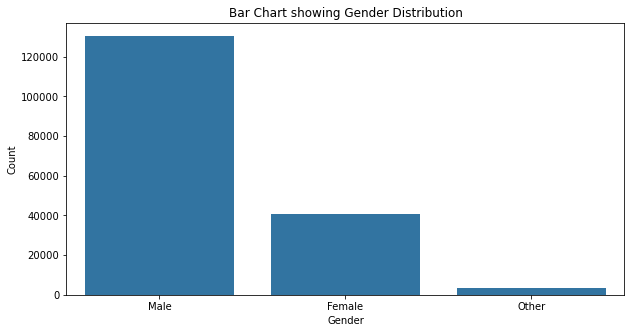

In [20]:
# Defining a function for plot administration
def plot_names(title,xax,yax):
    plt.title(title)
    plt.xlabel(xax)
    plt.ylabel(yax)
    ax.set(xlabel = xax, ylabel = yax)

plt.figure(figsize=(10,5))
color = sb.color_palette()[0]
freq = df_cleaned['member_gender'].value_counts()
order= freq.index
ax = sb.countplot(data = df_cleaned, x = 'member_gender',color = color, order = order)
plot_names('Bar Chart showing Gender Distribution','Gender','Count');

## 2. Average Duration per trip by Gender

The chart below suggests that Men tend to use less time on average per trip.

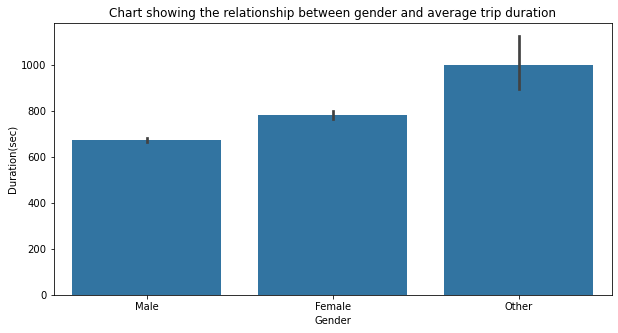

In [31]:
plt.figure(figsize=(10,5))
color = sb.color_palette()[0]
freq = df_cleaned['member_gender'].value_counts()
order = freq.index
sb.barplot( data = df_cleaned, x = 'member_gender', y = 'duration_sec', color = color, order = order)
plot_names('Chart showing the relationship between gender and average trip duration','Gender','Duration(sec)')

## 3. Average Duration per trip by User Type

The chart below suggests that `Subscribers` tend to use less time per trip compared to `customers`. However more information such as the distance of each trip amongst others would be necessary to draw definitive conclusions.

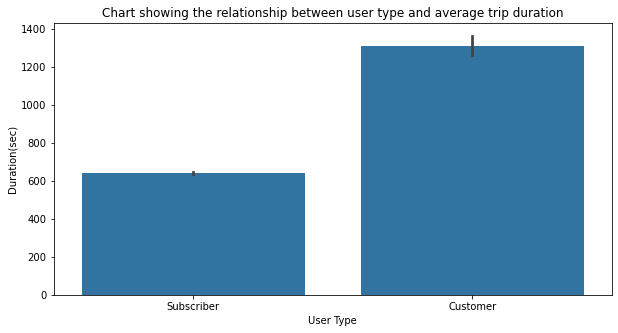

In [32]:
plt.figure(figsize=(10,5))
color = sb.color_palette()[0]
freq = df_cleaned['user_type'].value_counts()
order = freq.index
sb.barplot( data = df_cleaned, x = 'user_type', y = 'duration_sec', color = color, order = order)
plot_names('Chart showing the relationship between user type and average trip duration','User Type','Duration(sec)')

## 4. Distribution of User Types across Gender

The Chart below shows the distribution of user type for each Gender.The chart shows that there are more subscibers than customers for each gender type. Males have more subscribers and customers given that there are more males than any other gender type in this dataset as illustrated earlier.

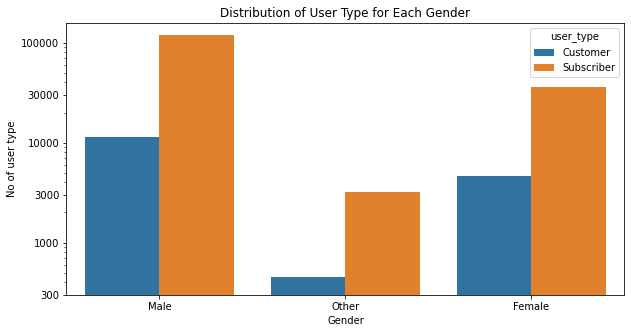

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sb.countplot(data = df_cleaned, x ='member_gender', hue = 'user_type', ax=ax )
ticks = [300, 1000, 3000, 10000, 30000,100000]
labels = ['{}'.format(v) for v in ticks]
g.set_yscale('log')
g.set_yticks(ticks)
g.set_yticklabels(labels)
plot_names('Distribution of User Type for Each Gender','Gender','No of user type')

## 5. Rider Station Traffic by Gender

The chart above shows the top 10 start stations distributed by gender. It can be seen that Males generally seem to be the highest contributors to traffic across all stations

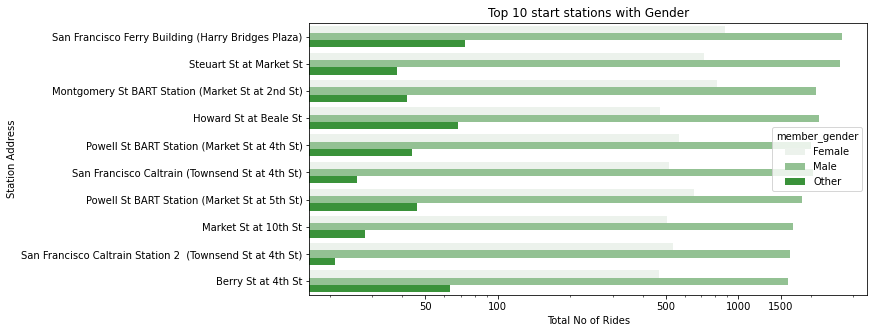

In [35]:
# Setting
stations = df_cleaned.start_station_id.value_counts().reset_index()
stations = stations.rename(columns = {'index': 'start_station_id','start_station_id':'count' }).head(10)
df_stations = stations.merge(df_cleaned, on = 'start_station_id', how = 'left')
lab = df_stations.groupby('start_station_id')['start_station_name'].value_counts().reset_index(level = 0)
labels = lab.index

# Plotting
plt.figure(figsize = (10,5))
color = sb.color_palette()[2]
ticks = [50, 100, 500 , 1000, 1500]
xylabels = ['{}'.format(v) for v in ticks]
g = sb.countplot( data = df_stations, y= 'start_station_id', hue = 'member_gender', color =color)
g.set_yticklabels(labels)
g.set_xscale('log')
g.set_xticks(ticks)
g.set_xticklabels(xylabels)
plot_names('Top 10 start stations with Gender','Total No of Rides','Station Address')

## 6. Top 10 Start stations by rider traffic

There are 329 start stations in this dataset. The chart below highlights the top 10 start stations by the total number of rides. This would be a good metric in selecting stations to place ads, surverys or any other activity that would require engagement with riders


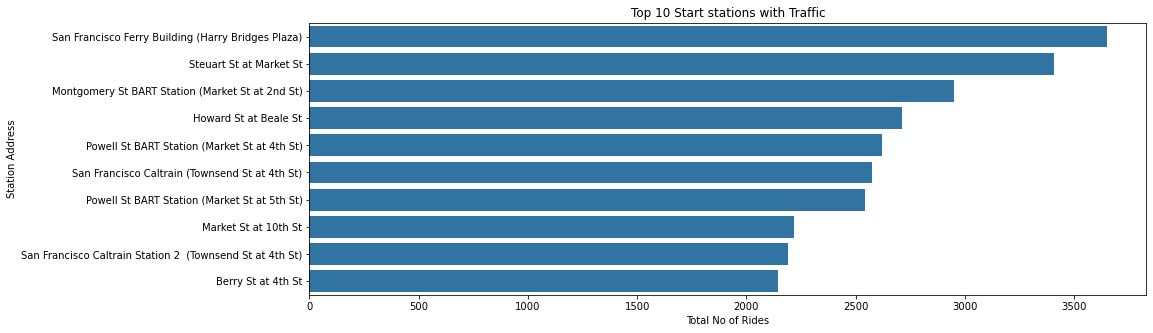

In [36]:
# Setting
stations = df_cleaned.start_station_id.value_counts().reset_index()
stations = stations.rename(columns = {'index': 'start_station_id','start_station_id':'count' }).head(10)
df_stations = stations.merge(df_cleaned, on = 'start_station_id', how = 'left')
lab = df_stations.groupby('start_station_id')['start_station_name'].value_counts().reset_index(level = 0)
labels = lab.index

# Plotting
plt.figure(figsize = (15,5))
color = sb.color_palette()[0]
freq = df_stations['start_station_id'].value_counts()
order = freq.index
g = sb.barplot( data = df_stations, x= 'count', y = 'start_station_id', color = color)
g.set_yticklabels(labels)
plot_names('Top 10 Start stations with Traffic','Total No of Rides','Station Address')



### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [37]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

The system cannot find the file specified.


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
